In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/10a_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
df.shape

(4268, 45)

In [5]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:45]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [ ]:
recall = []
f1 = []

In [6]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8583138173302107
[[575  90]
 [ 31 158]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       665
           1       0.64      0.84      0.72       189

    accuracy                           0.86       854
   macro avg       0.79      0.85      0.81       854
weighted avg       0.88      0.86      0.86       854



In [9]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.870023419203747
[[620  45]
 [ 66 123]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       665
           1       0.73      0.65      0.69       189

    accuracy                           0.87       854
   macro avg       0.82      0.79      0.80       854
weighted avg       0.87      0.87      0.87       854



In [10]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9063231850117096
[[632  33]
 [ 47 142]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       665
           1       0.81      0.75      0.78       189

    accuracy                           0.91       854
   macro avg       0.87      0.85      0.86       854
weighted avg       0.90      0.91      0.91       854



In [11]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.870023419203747
[[607  58]
 [ 53 136]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       665
           1       0.70      0.72      0.71       189

    accuracy                           0.87       854
   macro avg       0.81      0.82      0.81       854
weighted avg       0.87      0.87      0.87       854



In [12]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.870023419203747
[[648  17]
 [ 94  95]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       665
           1       0.85      0.50      0.63       189

    accuracy                           0.87       854
   macro avg       0.86      0.74      0.78       854
weighted avg       0.87      0.87      0.86       854



In [13]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8875878220140515
[[625  40]
 [ 56 133]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       665
           1       0.77      0.70      0.73       189

    accuracy                           0.89       854
   macro avg       0.84      0.82      0.83       854
weighted avg       0.88      0.89      0.89       854



In [14]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7693208430913349
[[498 167]
 [ 30 159]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       665
           1       0.49      0.84      0.62       189

    accuracy                           0.77       854
   macro avg       0.72      0.80      0.73       854
weighted avg       0.84      0.77      0.79       854



In [15]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.9016393442622951
[[637  28]
 [ 56 133]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       665
           1       0.83      0.70      0.76       189

    accuracy                           0.90       854
   macro avg       0.87      0.83      0.85       854
weighted avg       0.90      0.90      0.90       854



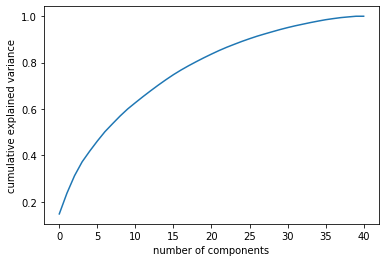

In [16]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [17]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [18]:
pca.n_components_

19

In [19]:
pca.explained_variance_ratio_

array([0.14720723, 0.08903386, 0.07555005, 0.06002366, 0.04637075,
       0.04338816, 0.04044797, 0.03428257, 0.03353125, 0.03053441,
       0.02673069, 0.0260908 , 0.02513647, 0.02435325, 0.02319413,
       0.02202756, 0.0200992 , 0.01856166, 0.01748412])

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14720723, 0.23624109, 0.31179114, 0.3718148 , 0.41818554,
       0.4615737 , 0.50202167, 0.53630423, 0.56983548, 0.6003699 ,
       0.62710059, 0.65319138, 0.67832786, 0.7026811 , 0.72587523,
       0.74790279, 0.768002  , 0.78656366, 0.80404777])

In [21]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [22]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8407494145199064
[[567  98]
 [ 38 151]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       665
           1       0.61      0.80      0.69       189

    accuracy                           0.84       854
   macro avg       0.77      0.83      0.79       854
weighted avg       0.86      0.84      0.85       854



In [23]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8243559718969555
[[552 113]
 [ 37 152]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       665
           1       0.57      0.80      0.67       189

    accuracy                           0.82       854
   macro avg       0.76      0.82      0.77       854
weighted avg       0.86      0.82      0.83       854



In [24]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8782201405152225
[[587  78]
 [ 26 163]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       665
           1       0.68      0.86      0.76       189

    accuracy                           0.88       854
   macro avg       0.82      0.87      0.84       854
weighted avg       0.90      0.88      0.88       854



In [25]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8372365339578455
[[576  89]
 [ 50 139]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       665
           1       0.61      0.74      0.67       189

    accuracy                           0.84       854
   macro avg       0.76      0.80      0.78       854
weighted avg       0.85      0.84      0.84       854



In [26]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7447306791569087
[[466 199]
 [ 19 170]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       665
           1       0.46      0.90      0.61       189

    accuracy                           0.74       854
   macro avg       0.71      0.80      0.71       854
weighted avg       0.85      0.74      0.77       854



In [27]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7599531615925058
[[479 186]
 [ 19 170]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       665
           1       0.48      0.90      0.62       189

    accuracy                           0.76       854
   macro avg       0.72      0.81      0.72       854
weighted avg       0.85      0.76      0.78       854



In [28]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.7927400468384075
[[521 144]
 [ 33 156]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       665
           1       0.52      0.83      0.64       189

    accuracy                           0.79       854
   macro avg       0.73      0.80      0.75       854
weighted avg       0.85      0.79      0.81       854



In [29]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
recall.append(recall_score(Y_validation, predictions))
f1.append(f1_score(Y_validation, predictions))

0.8887587822014051
[[598  67]
 [ 28 161]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       665
           1       0.71      0.85      0.77       189

    accuracy                           0.89       854
   macro avg       0.83      0.88      0.85       854
weighted avg       0.90      0.89      0.89       854



In [30]:
print(recall)
print(f1)

[0.8359788359788359, 0.6507936507936508, 0.7513227513227513, 0.7195767195767195, 0.5026455026455027, 0.7037037037037037, 0.8412698412698413, 0.7037037037037037, 0.798941798941799, 0.8042328042328042, 0.8624338624338624, 0.7354497354497355, 0.8994708994708994, 0.8994708994708994, 0.8253968253968254, 0.8518518518518519]
[0.7231121281464531, 0.6890756302521008, 0.7802197802197802, 0.7101827676240208, 0.6312292358803987, 0.734806629834254, 0.6174757281553398, 0.76, 0.6894977168949771, 0.6696035242290749, 0.7581395348837209, 0.6666666666666667, 0.6093189964157707, 0.6238532110091743, 0.6380368098159509, 0.7721822541966428]
